In [1]:
library(dplyr)
library(lme4)
library(tidyr)
library(nlme)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘tidyr’

The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


Attaching package: ‘nlme’

The following object is masked from ‘package:lme4’:

    lmList

The following object is masked from ‘package:dplyr’:

    collapse



In [2]:
Sys.setlocale('LC_ALL','C')

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

## Mixed Effects Modeling of Latitudinal Effects Performance Ratio

In [342]:
plankton <- read.csv("../data/Phytoplankton_temperature_growth_rate_dataset_2016_01_29/traits_derived_2016_01_29.csv")

In [343]:
performance <- read.csv("./isolate_performance.csv")

In [345]:
joined_data = performance %>% left_join(plankton %>% rename('isolate' = 'isolate.code'), by='isolate')

In [346]:
# python doy_combined.loc[doy_combined.lat.between(-90, 0), 'doy'] = (doy_combined.loc[doy_combined.lat.between(-90, 0), 'doy'] - 180) % 365
joined_data[between(joined_data$lat, -90, 0), 'peak_doy'] = (joined_data[between(joined_data$lat, -90, 0), 'peak_doy'] - 180) %% 365

In [347]:
joined_data = joined_data %>% drop_na('performance_ratio_mean')

In [349]:
joined_data = joined_data %>% mutate(lat_scaled = scale(lat), sst_scaled = scale(to))

In [350]:
colnames(joined_data)

[1] "X"                                 "lat"                              
 [3] "lon"                               "isolate"                          
 [5] "mhw"                               "detriment_sum"                    
 [7] "relative_detriment_mean"           "detriment_mean"                   
 [9] "performance_diff_sum"              "performance_ratio_mean"           
[11] "intensity_cumulative"              "intensity_mean"                   
[13] "duration"                          "start_doy"                        
[15] "peak_doy"                          "current_year_sst_mean"            
[17] "perf_det_ratio"                    "latbin"                           
[19] "doy_bins"                          "source"                           
[21] "isolation.latitude"                "isolation.longitude"              
[23] "habitat"                           "name"                             
[25] "speciesname"                       "former.name.1"                    
[27] "former.name.2"                     "strain"                           
[29] "clone"                             "species"                          
[31] "genus"                             "family"                           
[33] "order"                             "class"                            
[35] "phylum"                            "kingdom"                          
[37] "domain"                            "comment"                          
[39] "group"                             "mu.rsqrlist"                      
[41] "mu.wlist"                          "mu.alist"                         
[43] "mu.blist"                          "mu.slist"                         
[45] "mu.c.opt.list"                     "mu.c.opt.val.list"                
[47] "mu.g.opt.list"                     "mu.g.opt.val.list"                
[49] "mu.n"                              "emp.max.growth"                   
[51] "tmin"                              "tmax"                             
[53] "minqual"                           "maxqual"                          
[55] "curvequal"                         "abs.curveskew"                    
[57] "rel.curveskew"                     "used.for.optimum.analysis"        
[59] "used.for.tmax.analysis"            "used.for.tmin.analysis"           
[61] "used.for.niche.width.analysis"     "used.for.max.growth.rate.analysis"
[63] "lat_scaled"                        "sst_scaled"

In [14]:
test_mod = lm("performance_ratio_mean ~ current_year_sst_mean + lat + poly(lat, 2)", data=joined_data)

In [15]:
summary(test_mod)


Call:
lm(formula = "performance_ratio_mean ~ current_year_sst_mean + lat + poly(lat, 2)", 
    data = joined_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -1.484  -0.284  -0.170  -0.054 219.670 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.416059   0.340768   4.155  3.3e-05 ***
current_year_sst_mean -0.009608   0.017028  -0.564    0.573    
lat                    0.001813   0.001622   1.117    0.264    
poly(lat, 2)1                NA         NA      NA       NA    
poly(lat, 2)2          1.641856   8.952186   0.183    0.854    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.583 on 4915 degrees of freedom
Multiple R-squared:  0.00093,	Adjusted R-squared:  0.0003202 
F-statistic: 1.525 on 3 and 4915 DF,  p-value: 0.2058


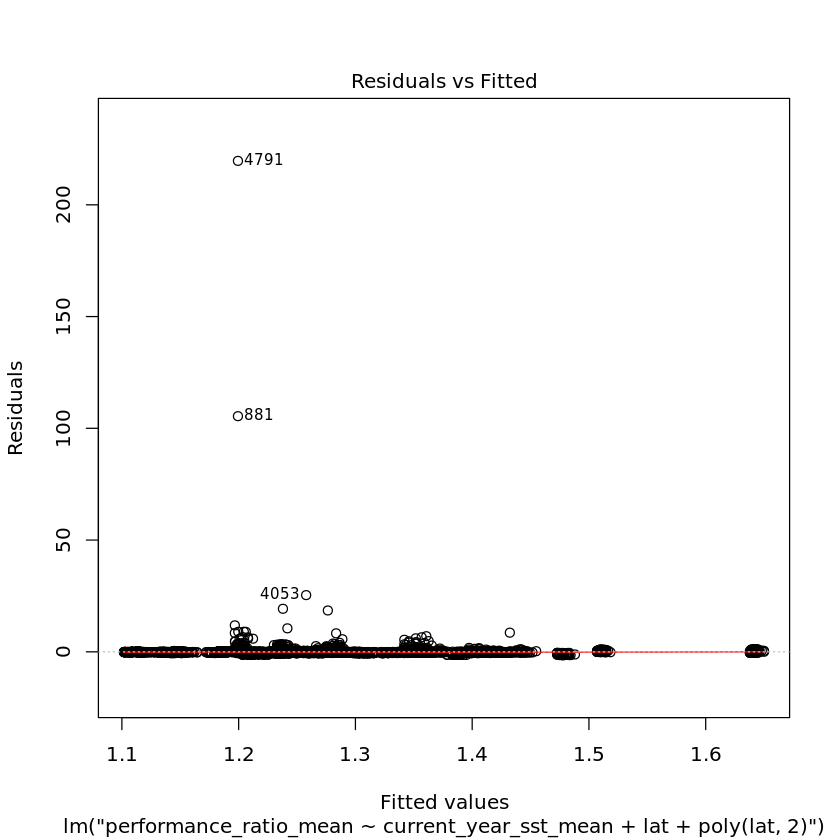

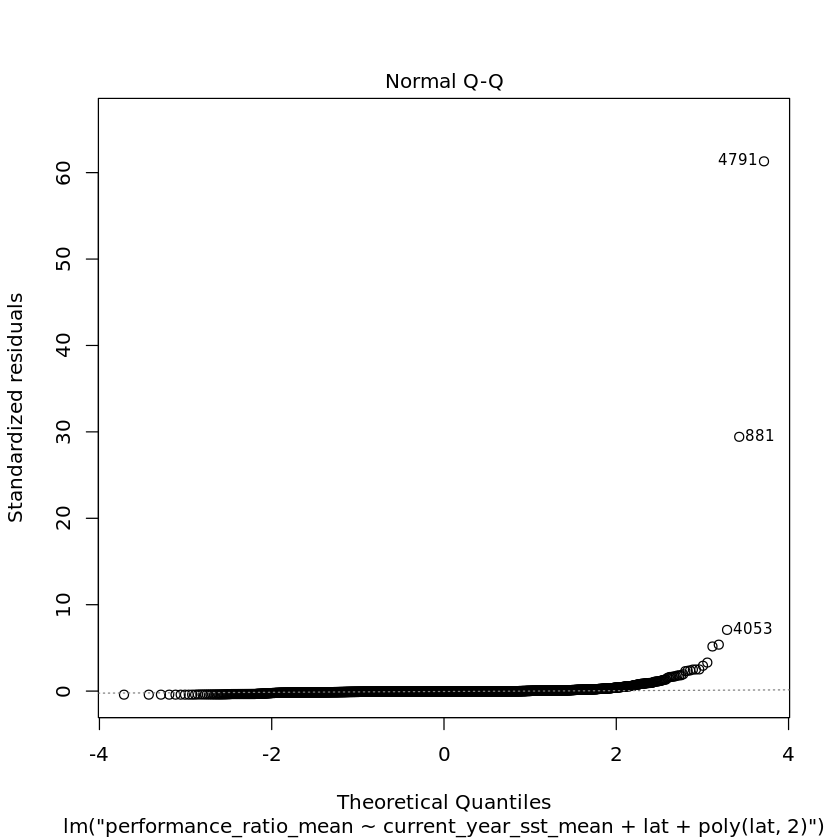

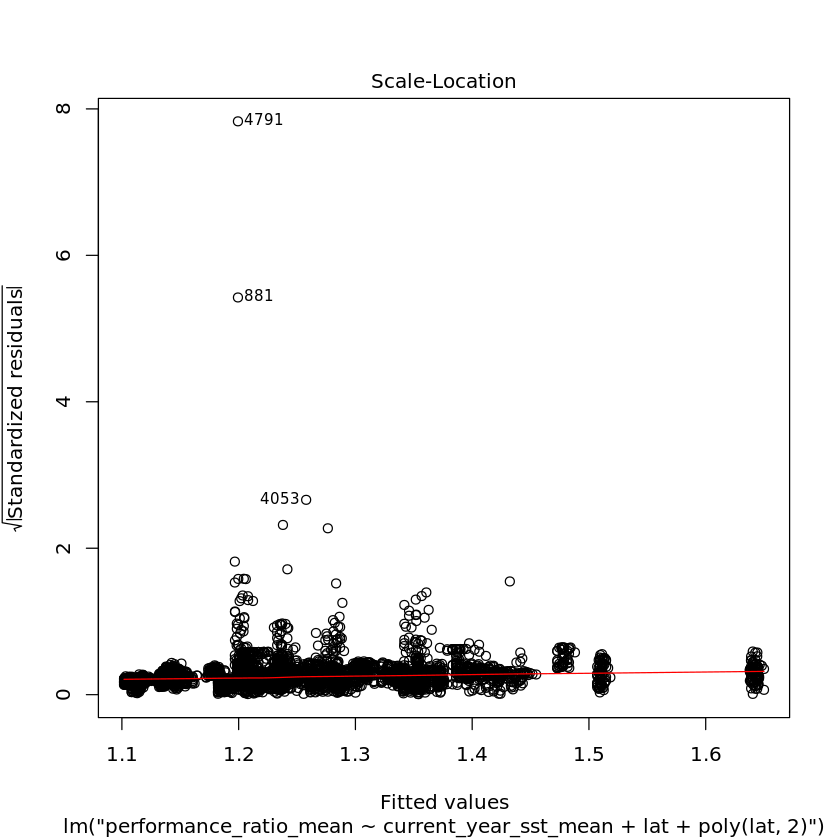

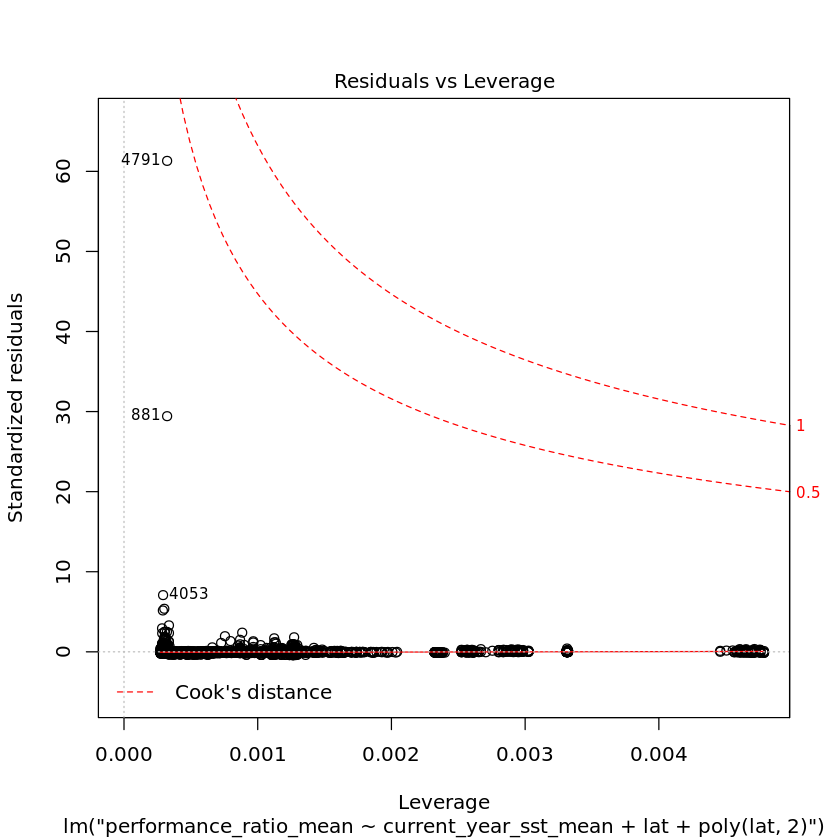

In [16]:
plot(test_mod)

In [71]:
test_mod_re = lmer("performance_ratio_mean ~ sst_scaled + lat_scaled + poly(lat_scaled, 2) + (1 | order)", data=joined_data )

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient


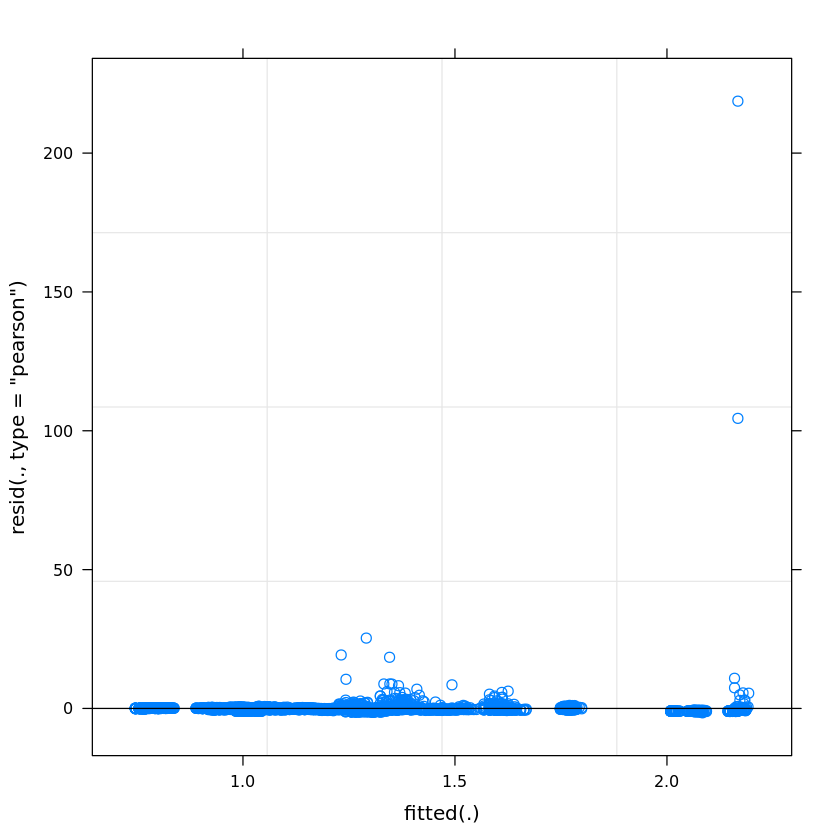

In [72]:
plot(test_mod_re)

In [73]:
summary(test_mod_re)

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ sst_scaled + lat_scaled + poly(lat_scaled,  
    2) + (1 | order)
   Data: joined_data

REML criterion at convergence: 26494.8

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.443 -0.080 -0.031  0.011 61.305 

Random effects:
 Groups   Name        Variance Std.Dev.
 order    (Intercept)  0.114   0.3377  
 Residual             12.727   3.5675  
Number of obs: 4919, groups:  order, 23

Fixed effects:
                     Estimate Std. Error t value
(Intercept)           1.23718    0.09086  13.617
sst_scaled           -0.21471    0.15424  -1.392
lat_scaled            0.09924    0.06072   1.634
poly(lat_scaled, 2)2 -4.40514   10.75901  -0.409

Correlation of Fixed Effects:
            (Intr) sst_sc lt_scl
sst_scaled  -0.016              
lat_scaled   0.046 -0.045       
ply(lt_,2)2 -0.030  0.915 -0.060
fit warnings:
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient

In [74]:
perf_ratio = joined_data %>% select(performance_ratio_mean)
latitude = joined_data %>% select(lat)

In [ ]:
install

--
long heatwaves

In [76]:
long_heatwaves <- joined_data %>% filter(duration > 20)

In [144]:

lme_output = lmer(performance_ratio_mean ~ lat  + I(lat^2) + current_year_sst_mean + (1| isolate), data=long_heatwaves)

Warning message:
"Some predictor variables are on very different scales: consider rescaling"

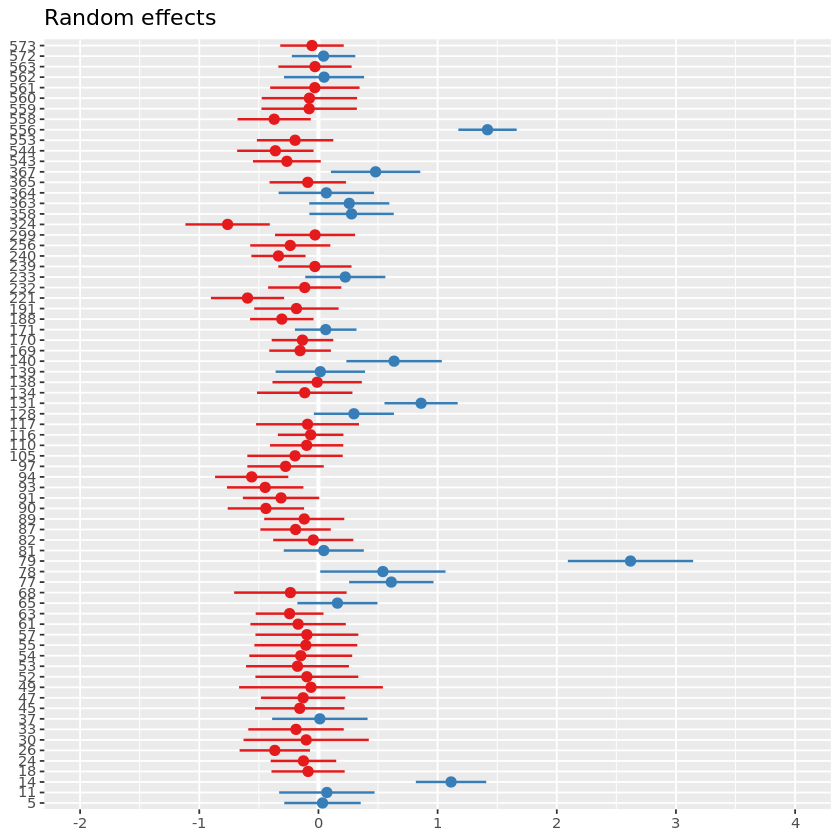

In [145]:
plot_model(lme_output, type='re')

In [150]:
plot_model(lme_output, type='pred.fe', )

ERROR: Error in match.arg(type): 'arg' should be one of "est", "re", "eff", "emm", "pred", "int", "std", "std2", "slope", "resid", "diag"


In [147]:
lme_output

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ lat + I(lat^2) + current_year_sst_mean +  
    (1 | isolate)
   Data: long_heatwaves
REML criterion at convergence: 1282.032
Random effects:
 Groups   Name        Std.Dev.
 isolate  (Intercept) 0.5098  
 Residual             0.5463  
Number of obs: 671, groups:  isolate, 73
Fixed Effects:
          (Intercept)                    lat               I(lat^2)  
            1.540e+00              7.135e-04             -3.684e-06  
current_year_sst_mean  
           -1.641e-02  
fit warnings:
Some predictor variables are on very different scales: consider rescaling

In [151]:
sjt.lmer

ERROR: Error in eval(expr, envir, enclos): object 'sjt.lmer' not found


In [177]:

this_lm = lm(performance_ratio_mean ~ lat  + I(lat^2), data=long_heatwaves)

In [181]:
this_lm


Call:
lm(formula = performance_ratio_mean ~ lat + I(lat^2), data = long_heatwaves)

Coefficients:
(Intercept)          lat     I(lat^2)  
  1.0718802   -0.0001395    0.0001101  


ERROR: Error in UseMethod("ranef"): no applicable method for 'ranef' applied to an object of class "lm"


Model contains polynomial or cubic / quadratic terms. Consider using `terms="lat [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.


$lat


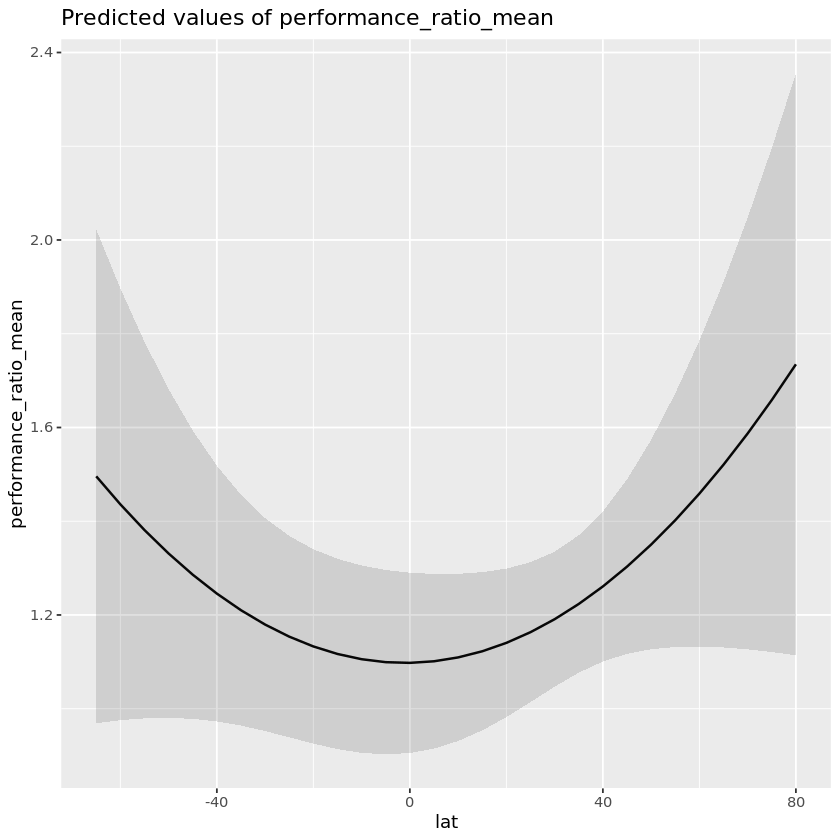

In [166]:
plot_model(lme_interact, type='pred')

---

In [196]:
lme1 = lmer(performance_ratio_mean ~ lat + I(lat^2) + current_year_sst_mean + (1 | isolate), data=joined_data)
summary(lme1)

Warning message:
"Some predictor variables are on very different scales: consider rescaling"

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ lat + I(lat^2) + current_year_sst_mean +  
    (1 | isolate)
   Data: joined_data

REML criterion at convergence: 26454.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.769 -0.043 -0.013  0.010 60.919 

Random effects:
 Groups   Name        Variance Std.Dev.
 isolate  (Intercept)  1.106   1.052   
 Residual             12.251   3.500   
Number of obs: 4919, groups:  isolate, 73

Fixed effects:
                       Estimate Std. Error t value
(Intercept)           0.8857278  1.1243780   0.788
lat                   0.0017276  0.0045670   0.378
I(lat^2)              0.0001098  0.0002802   0.392
current_year_sst_mean 0.0147217  0.0414268   0.355

Correlation of Fixed Effects:
            (Intr) lat    I(l^2)
lat          0.237              
I(lat^2)    -0.940 -0.317       
crrnt_yr_s_ -0.984 -0.284  0.903
fit warnings:
Some predictor variables are on very different scales: consider rescaling

Model contains polynomial or cubic / quadratic terms. Consider using `terms="lat [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.
Model contains polynomial or cubic / quadratic terms. Consider using `terms="current_year_sst_mean [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.


$lat

$current_year_sst_mean


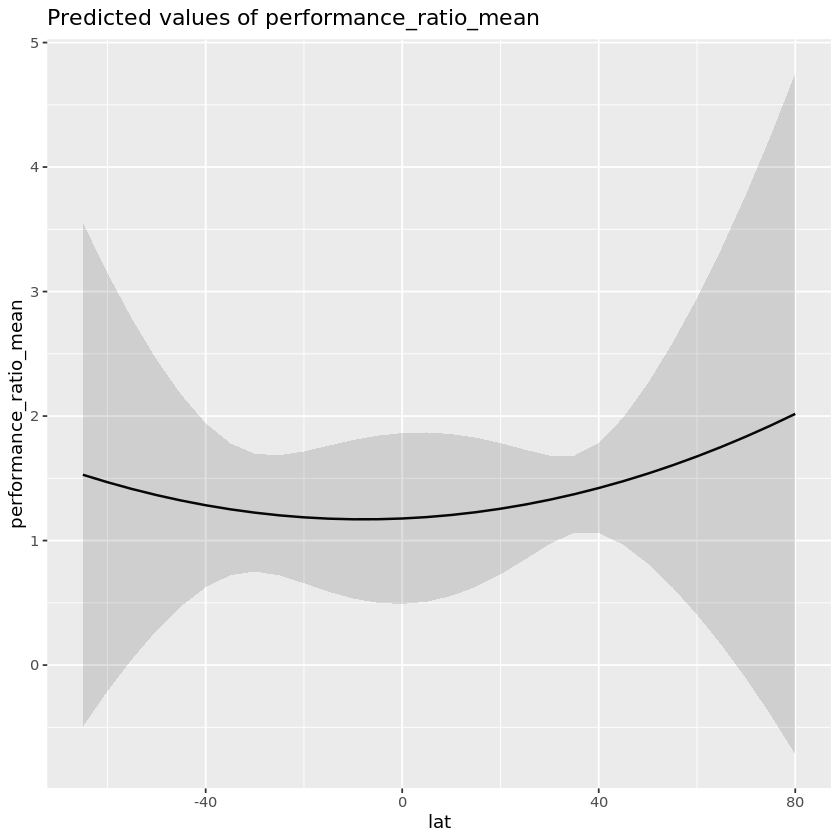

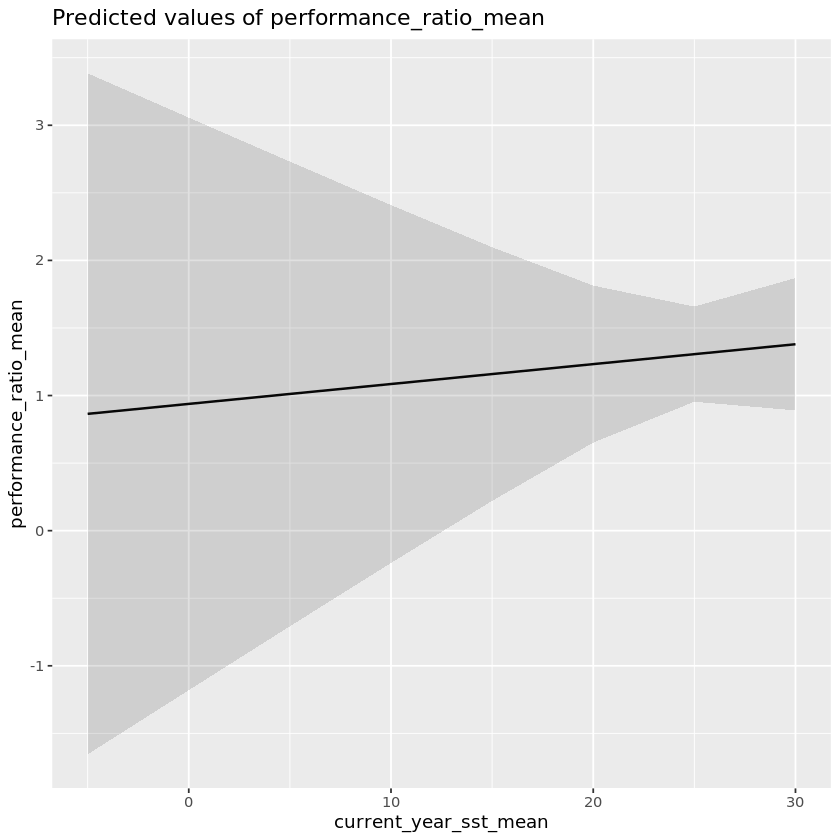

In [198]:
plot_model(lme1, type='pred')

In [200]:
lm1 = lm(performance_ratio_mean ~ lat + I(lat^2) + current_year_sst_mean , data=joined_data)
summary(lm1)


Call:
lm(formula = performance_ratio_mean ~ lat + I(lat^2) + current_year_sst_mean, 
    data = joined_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -1.484  -0.284  -0.170  -0.054 219.670 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)            1.392e+00  4.609e-01   3.021  0.00253 **
lat                    1.711e-03  1.737e-03   0.985  0.32483   
I(lat^2)               2.055e-05  1.121e-04   0.183  0.85449   
current_year_sst_mean -9.608e-03  1.703e-02  -0.564  0.57263   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.583 on 4915 degrees of freedom
Multiple R-squared:  0.00093,	Adjusted R-squared:  0.0003202 
F-statistic: 1.525 on 3 and 4915 DF,  p-value: 0.2058


$lat

$current_year_sst_mean


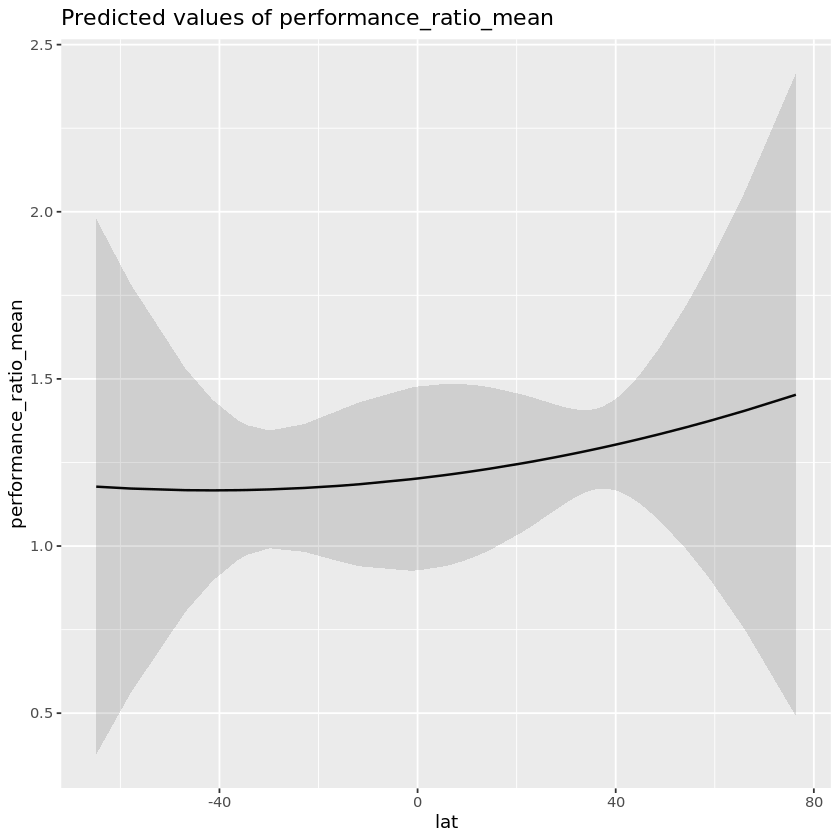

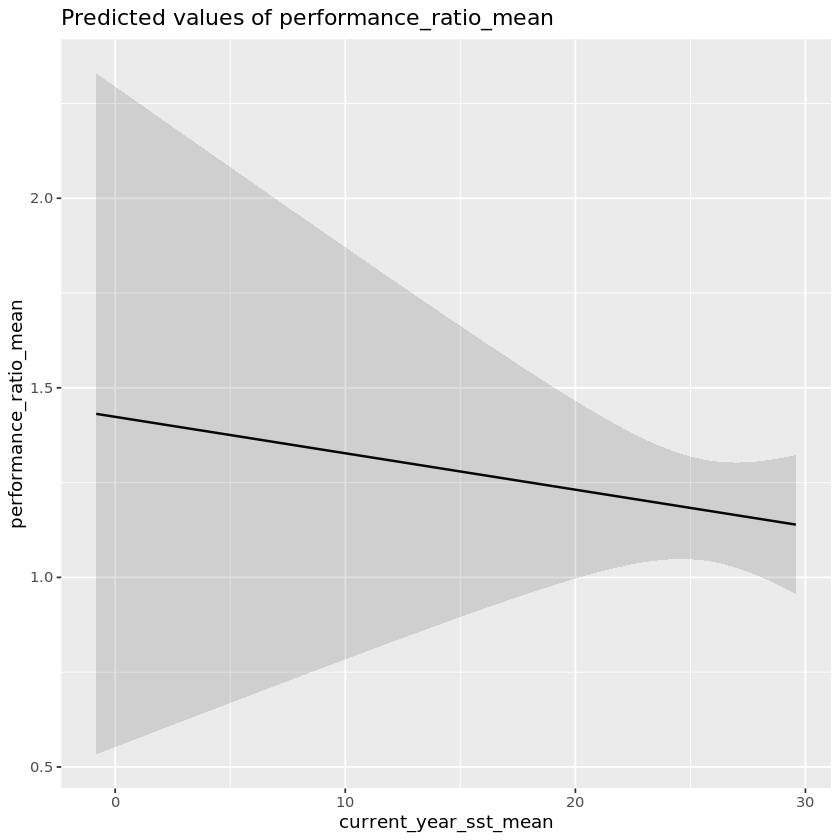

In [202]:
plot_model(lm1, type='pred')

---

In [204]:
joined_data$sst_scaled = scale(joined_data$current_year_sst_mean, center=TRUE, scale=TRUE)

In [206]:
joined_data$lat_scaled = scale(joined_data$lat, center=TRUE, scale=TRUE)

In [210]:
library(ggplot2)

In [414]:
joined_data$genus_species = paste(joined_data$genus, joined_data$species)

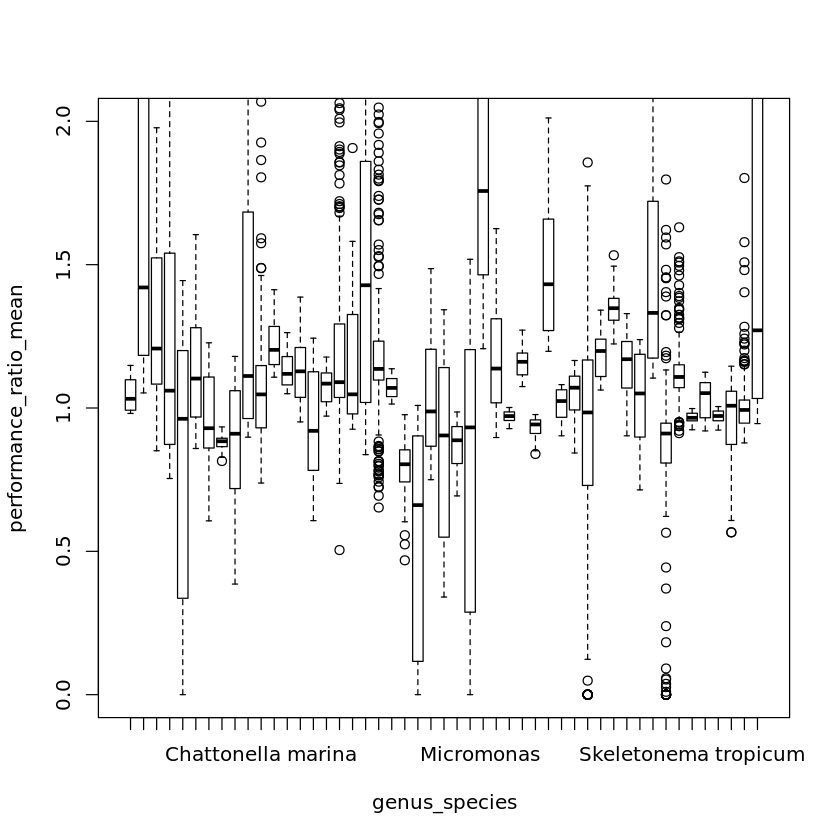

In [227]:
boxplot(performance_ratio_mean ~ genus_species, data=joined_data, ylim=c(0, 2))

In [242]:
mm = lmer(performance_ratio_mean ~ lat_scaled + (1|genus_species), data=joined_data)

In [238]:
summary(mm)

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ lat_scaled + (1 | genus_species)
   Data: joined_data

REML criterion at convergence: 26503.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.443 -0.072 -0.033  0.004 61.315 

Random effects:
 Groups        Name        Variance Std.Dev.
 genus_species (Intercept)  0.09408 0.3067  
 Residual                  12.72872 3.5677  
Number of obs: 4919, groups:  genus_species, 49

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1.21896    0.06945  17.552
lat_scaled   0.08407    0.06097   1.379

Correlation of Fixed Effects:
           (Intr)
lat_scaled -0.019

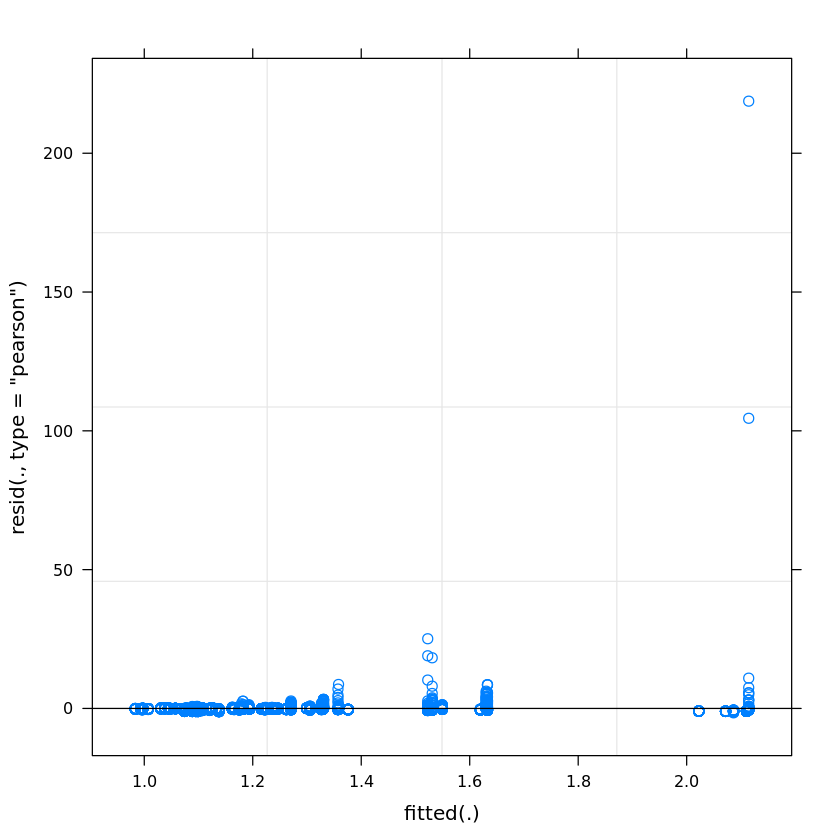

In [239]:
plot(mm)

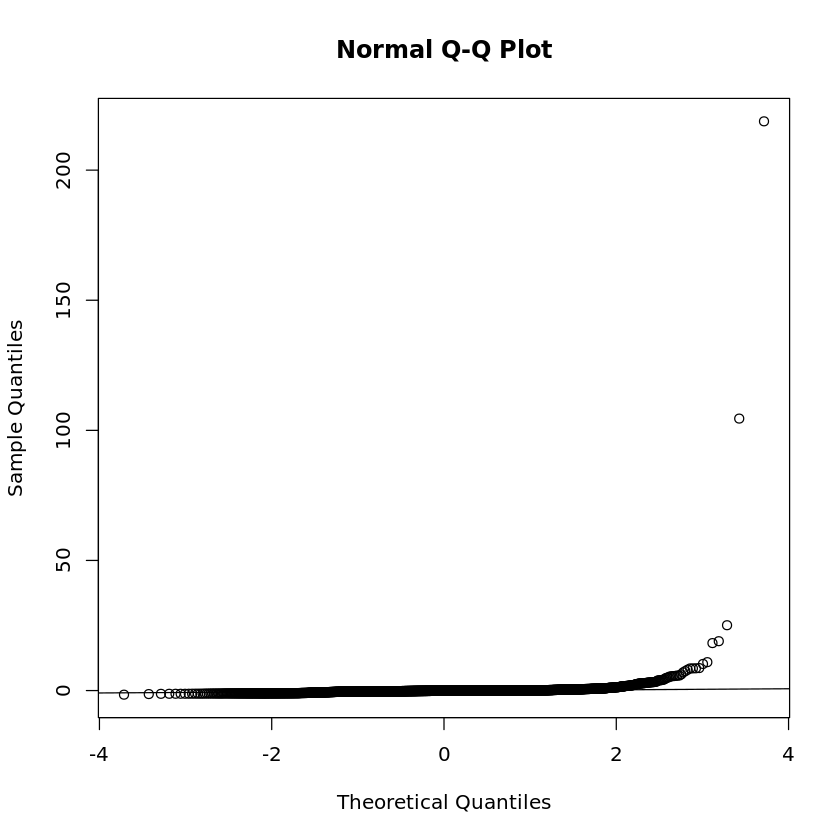

In [240]:
qqnorm(resid(mm))
qqline(resid(mm)) 

In [261]:
mm2 = lmer(performance_ratio_mean ~ lat_scaled + I(lat_scaled^2) + (1|genus_species), data=joined_data)

In [262]:
summary(mm2)

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ lat_scaled + I(lat_scaled^2) + (1 |  
    genus_species)
   Data: joined_data

REML criterion at convergence: 26504.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.431 -0.073 -0.025  0.002 61.334 

Random effects:
 Groups        Name        Variance Std.Dev.
 genus_species (Intercept)  0.09397 0.3066  
 Residual                  12.72219 3.5668  
Number of obs: 4919, groups:  genus_species, 49

Fixed effects:
                Estimate Std. Error t value
(Intercept)      1.10948    0.09060  12.245
lat_scaled       0.16520    0.07467   2.212
I(lat_scaled^2)  0.10537    0.05603   1.881

Correlation of Fixed Effects:
            (Intr) lt_scl
lat_scaled  -0.383       
I(lt_scl^2) -0.643  0.578

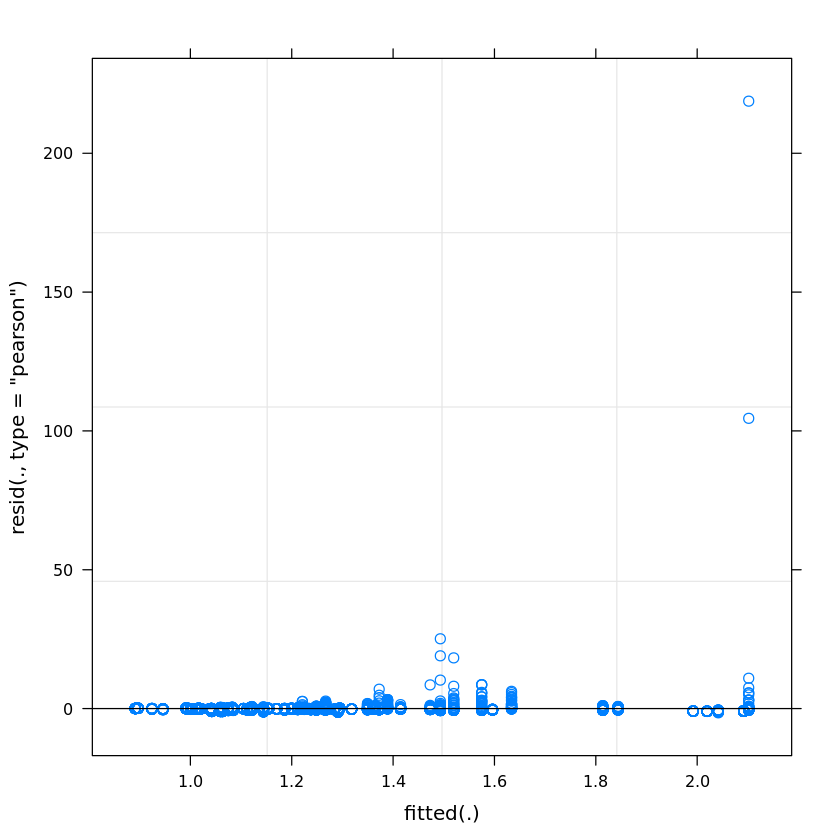

In [257]:
plot(mm2)

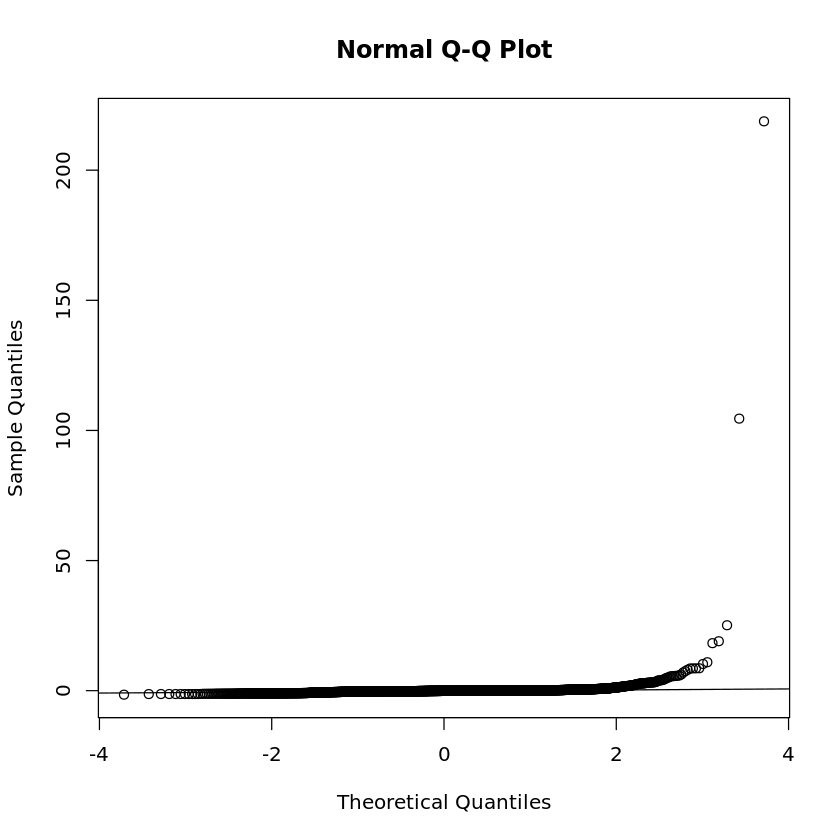

In [258]:
qqnorm(resid(mm2))
qqline(resid(mm2)) 

In [267]:
mm3 = lmer(performance_ratio_mean ~ lat_scaled + sst_scaled + I(lat_scaled^2) + (1|genus_species), data=joined_data)

In [269]:
summary(mm3)

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ lat_scaled + sst_scaled + I(lat_scaled^2) +  
    (1 | genus_species)
   Data: joined_data

REML criterion at convergence: 26505.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.431 -0.075 -0.025  0.002 61.337 

Random effects:
 Groups        Name        Variance Std.Dev.
 genus_species (Intercept)  0.09899 0.3146  
 Residual                  12.71942 3.5664  
Number of obs: 4919, groups:  genus_species, 49

Fixed effects:
                Estimate Std. Error t value
(Intercept)      1.23763    0.15361   8.057
lat_scaled       0.06274    0.12404   0.506
sst_scaled      -0.16800    0.15992  -1.051
I(lat_scaled^2) -0.02731    0.13892  -0.197

Correlation of Fixed Effects:
            (Intr) lt_scl sst_sc
lat_scaled  -0.777              
sst_scaled  -0.803  0.796       
I(lt_scl^2) -0.889  0.869  0.914

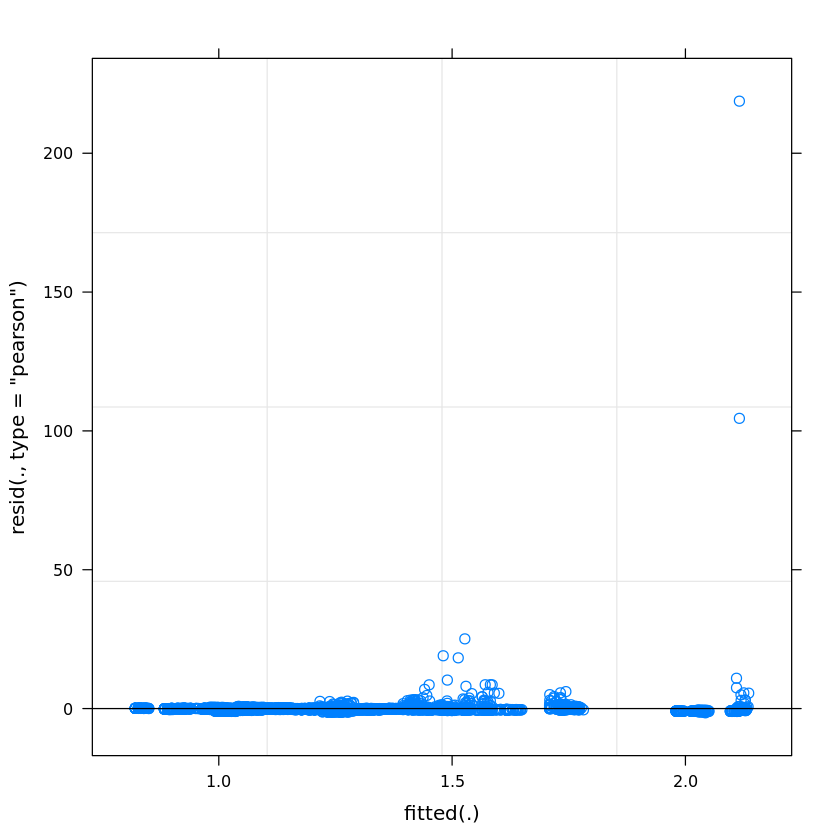

In [268]:
plot(mm3)

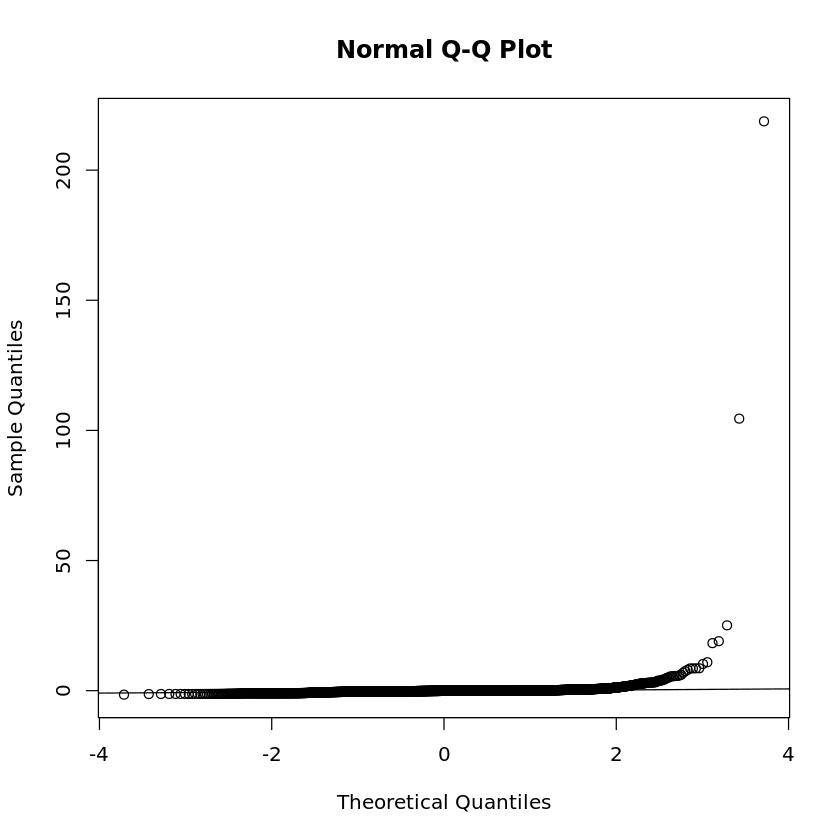

In [270]:
qqnorm(resid(mm3))
qqline(resid(mm3)) 

In [276]:
mm4 = lmer(performance_ratio_mean ~ lat_scaled + sst_scaled + I(lat_scaled^2) + (1|genus_species), data=joined_data)

In [277]:
summary(mm4)

Linear mixed model fit by REML ['lmerMod']
Formula: performance_ratio_mean ~ lat_scaled + sst_scaled + I(lat_scaled^2) +  
    (1 | genus_species)
   Data: joined_data

REML criterion at convergence: 26505.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.431 -0.075 -0.025  0.002 61.337 

Random effects:
 Groups        Name        Variance Std.Dev.
 genus_species (Intercept)  0.09899 0.3146  
 Residual                  12.71942 3.5664  
Number of obs: 4919, groups:  genus_species, 49

Fixed effects:
                Estimate Std. Error t value
(Intercept)      1.23763    0.15361   8.057
lat_scaled       0.06274    0.12404   0.506
sst_scaled      -0.16800    0.15992  -1.051
I(lat_scaled^2) -0.02731    0.13892  -0.197

Correlation of Fixed Effects:
            (Intr) lt_scl sst_sc
lat_scaled  -0.777              
sst_scaled  -0.803  0.796       
I(lt_scl^2) -0.889  0.869  0.914

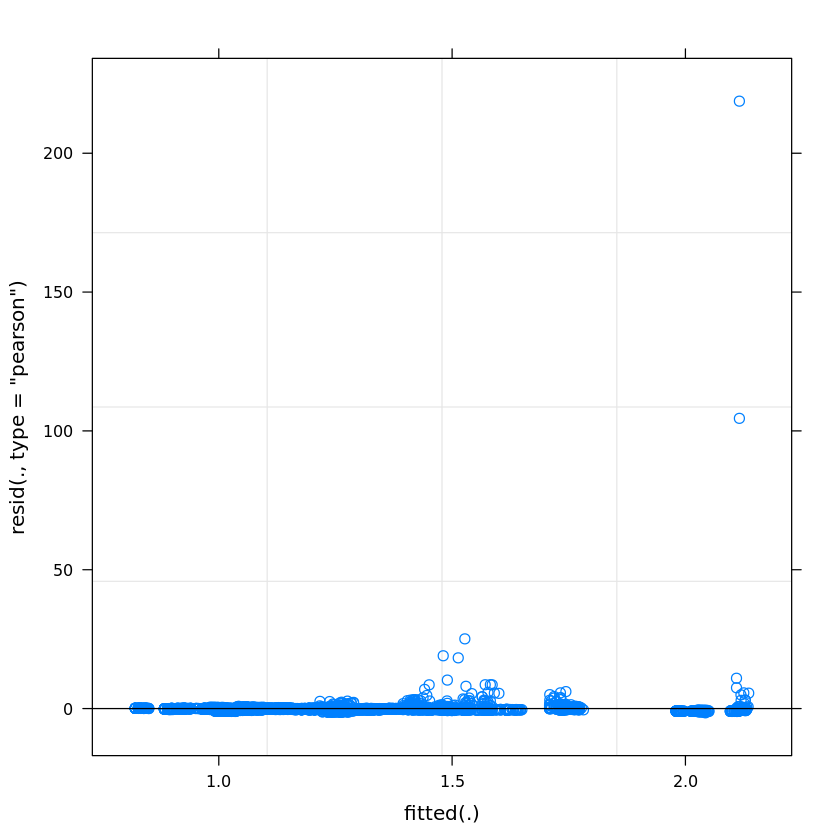

In [278]:
plot(mm4)

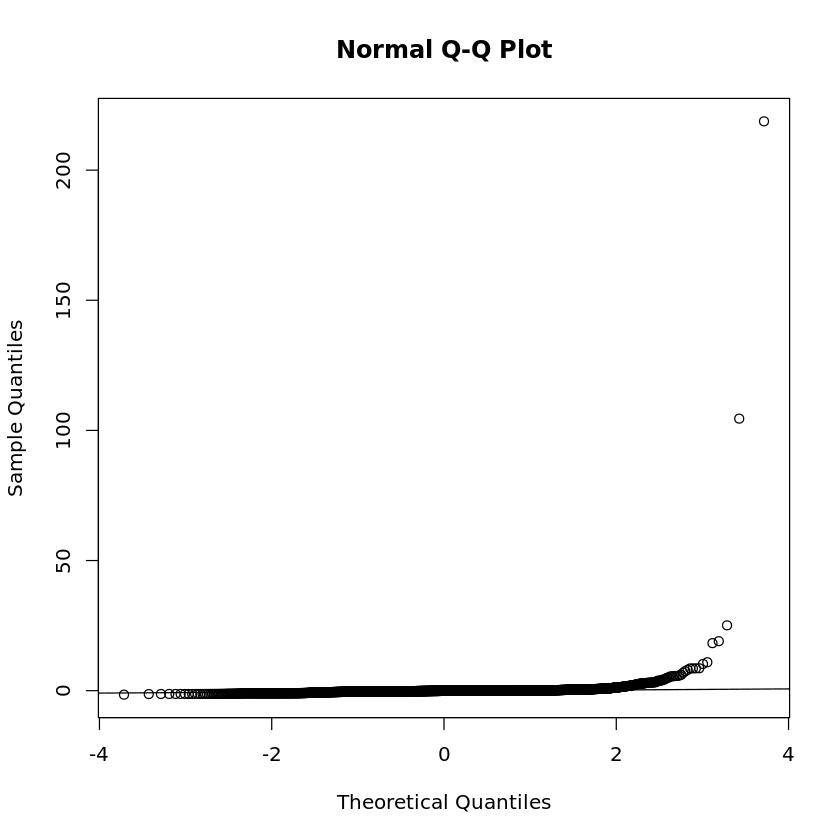

In [279]:
qqnorm(resid(mm3))
qqline(resid(mm3)) 

Model contains polynomial or cubic / quadratic terms. Consider using `terms="lat_scaled [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.
Model contains polynomial or cubic / quadratic terms. Consider using `terms="sst_scaled [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.


$lat_scaled

$sst_scaled


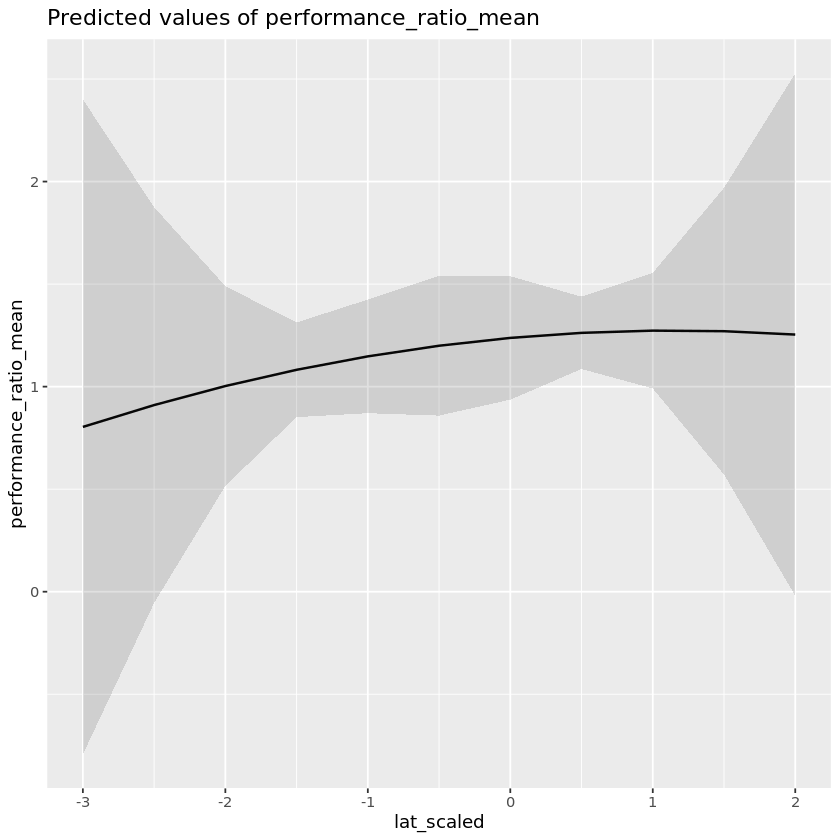

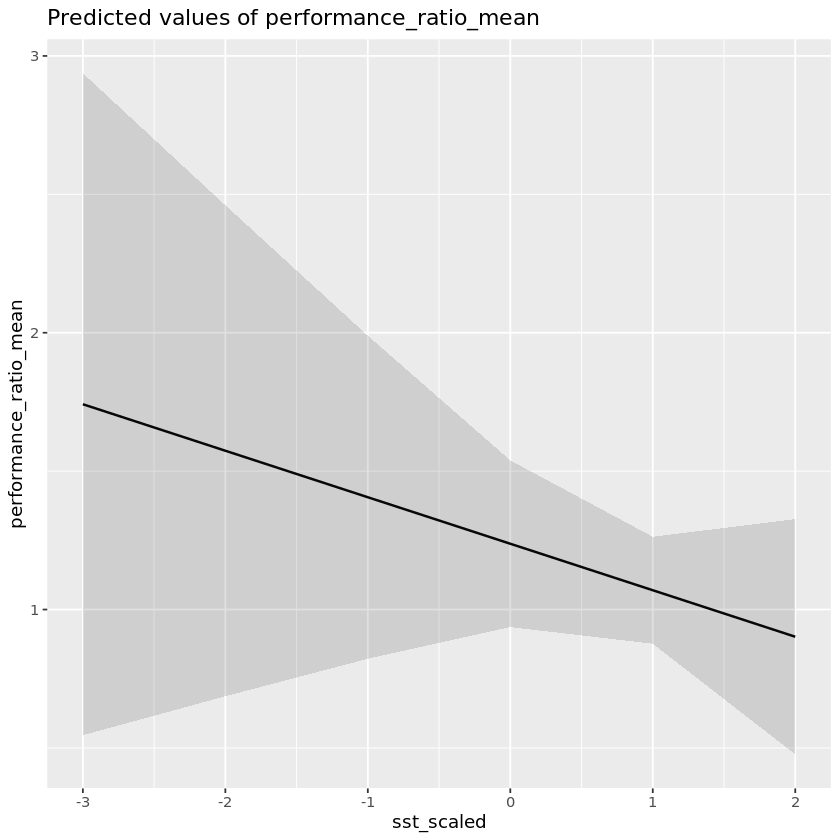

In [281]:
plot_model(mm3, type='pred', transform=NONE)

In [282]:
library(mgcv)

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


In [360]:
doy_to_season <- function(doy){
    if (between(doy, 0, 77) || between(doy, 355, 366)) {return (c("winter")) }
    else if (between(doy, 78, 170)) {return (c("spring"))}
    else if (between(doy, 171, 295)) {return (c("summer"))}
    else if (between(doy, 296, 354)) {return (c("fall"))}
}

In [383]:
seasons = sapply(joined_data$peak_doy, doy_to_season)

In [384]:
joined_data = joined_data %>% mutate(season=seasons)

In [380]:
joined_data$season = lapply(joined_data$peak_doy, doy_to_season)

In [422]:
gam_seas = gamm(performance_ratio_mean ~ s(lat) + s(current_year_sst_mean), random=list(genus_species=~1), data=joined_data, select=TRUE)
# gam_noseas = gamm(performance_ratio_mean ~ s(lat) + s(current_year_sst_mean), random=list(genus_species=~1), data=joined_data,)


Warning message in model.matrix.default(~b$groups[[n.levels - i + 1]] - 1, contrasts.arg = c("contr.treatment", :
"non-list contrasts argument ignored"

$lat

$current_year_sst_mean


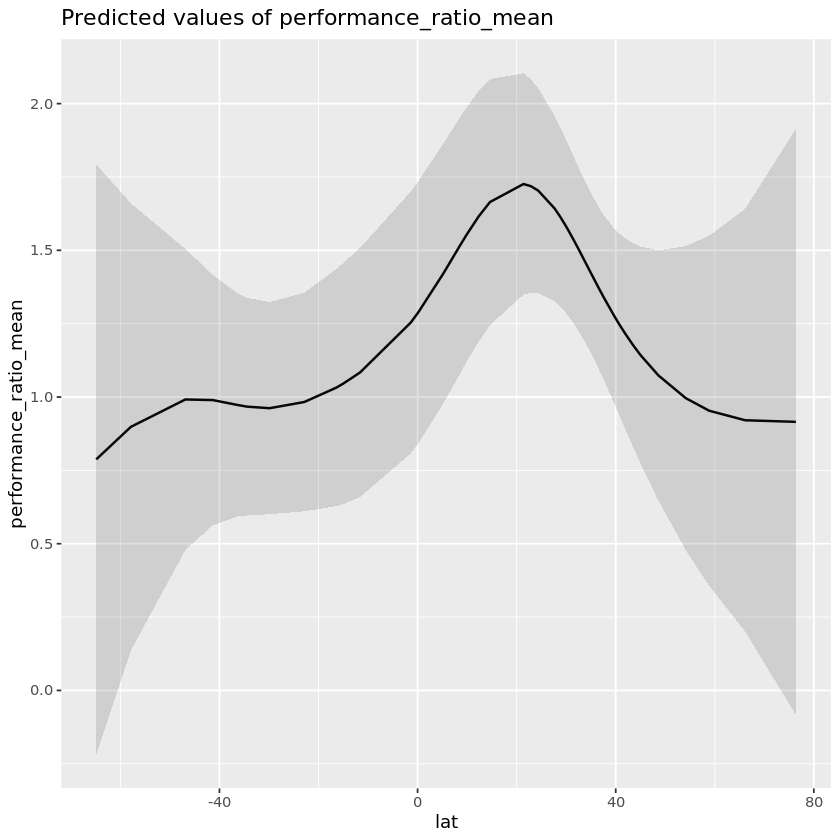

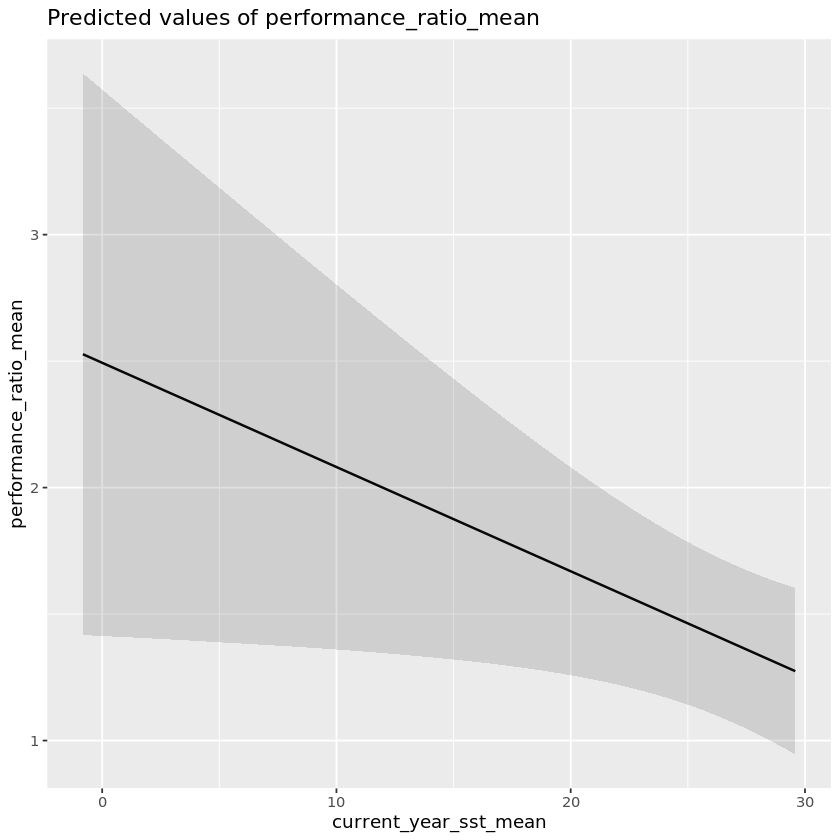

In [423]:
plot_model(gam_seas, type='pred')

---
reg w season`y


In [463]:
significant_mhws = joined_data %>% filter(duration > 20)

In [517]:
seas = lmer(performance_ratio_mean ~ lat_scaled + I(lat_scaled^2)  + (1|season) + (1|order) , data=significant_mhws)

In [518]:
no_seas = lmer(performance_ratio_mean ~ lat_scaled + I(lat_scaled^2)   + (1|order) , data=significant_mhws)

In [519]:
anova(no_seas, seas)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
no_seas,5,1406.076,1428.62,-698.0380,1396.076,NA,NA,NA
seas,6,1368.267,1395.32,-678.1336,1356.267,39.8089,1,2.800657e-10


In [520]:
summary(seas)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: performance_ratio_mean ~ lat_scaled + I(lat_scaled^2) + (1 |  
    season) + (1 | order)
   Data: significant_mhws

REML criterion at convergence: 1369

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6891 -0.3793 -0.1312  0.1970 12.9871 

Random effects:
 Groups   Name        Variance Std.Dev.
 order    (Intercept) 0.06700  0.2588  
 season   (Intercept) 0.03798  0.1949  
 Residual             0.41435  0.6437  
Number of obs: 671, groups:  order, 23; season, 4

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       1.07353    0.12026   6.05080   8.927 0.000105 ***
lat_scaled        0.13685    0.04032 381.68012   3.394 0.000760 ***
I(lat_scaled^2)   0.11999    0.03015 340.93557   3.979 8.44e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) lt_scl
lat_scaled  

[[1]]

[[2]]


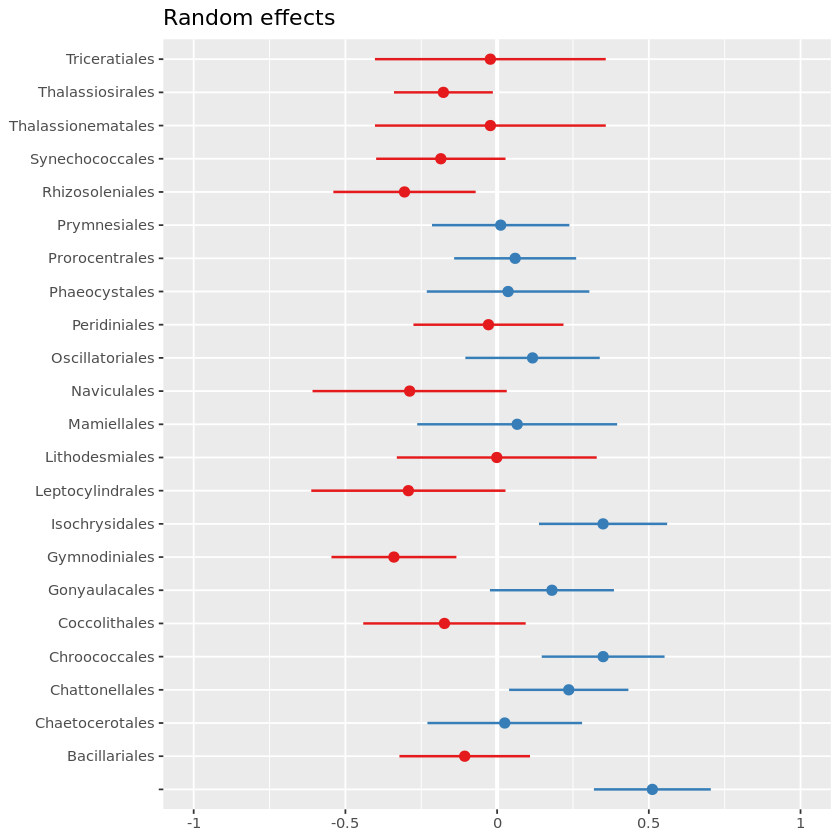

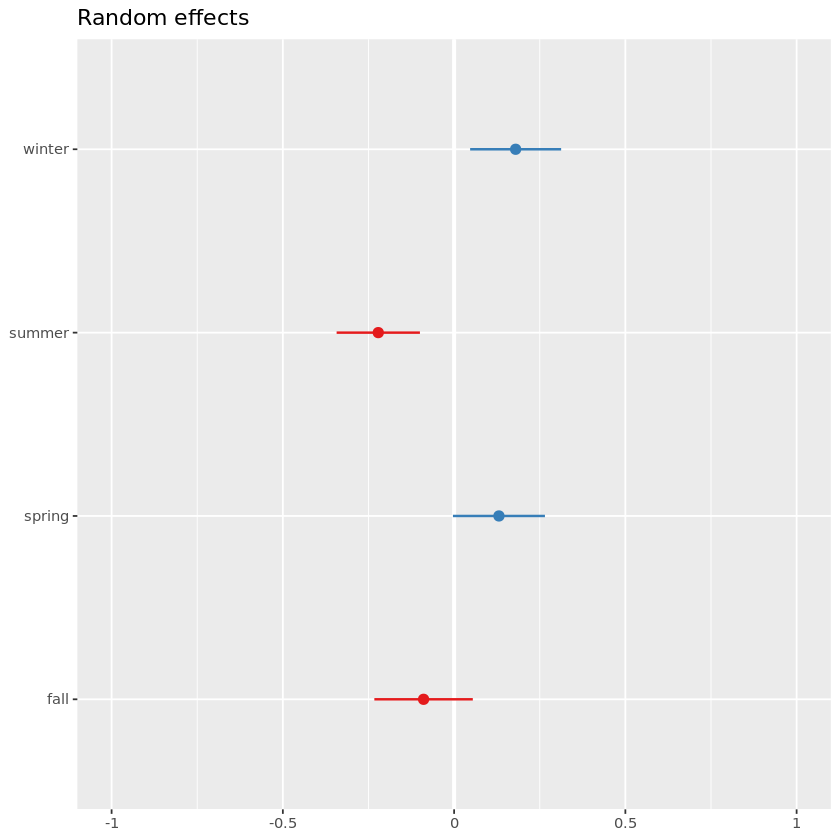

In [521]:
plot_model(seas, type='re', xlim=c(-10, 10))

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


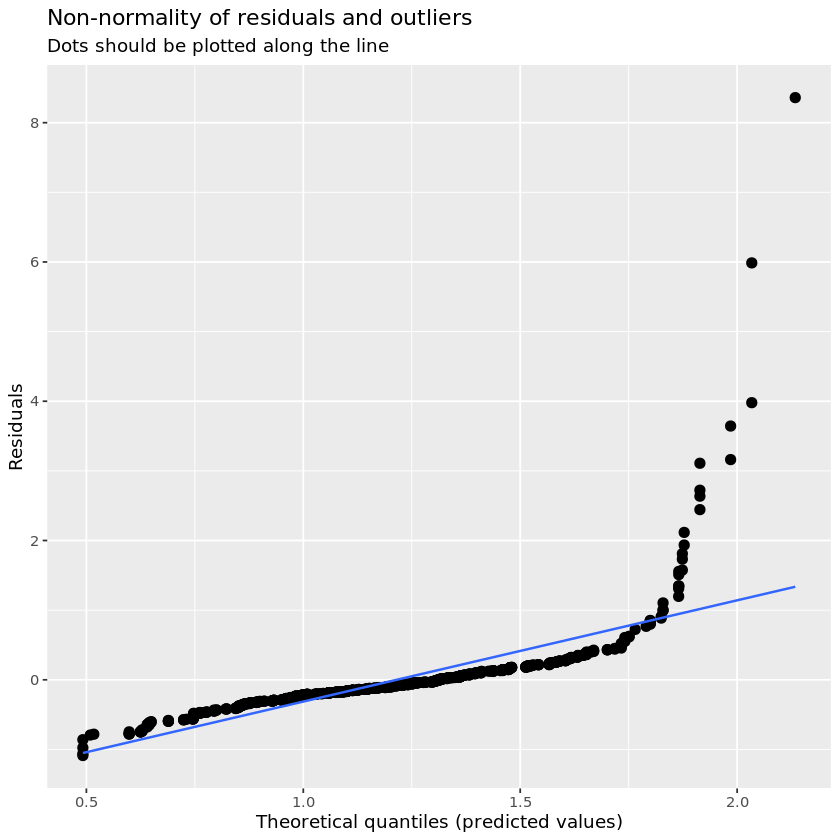

`geom_smooth()` using formula 'y ~ x'


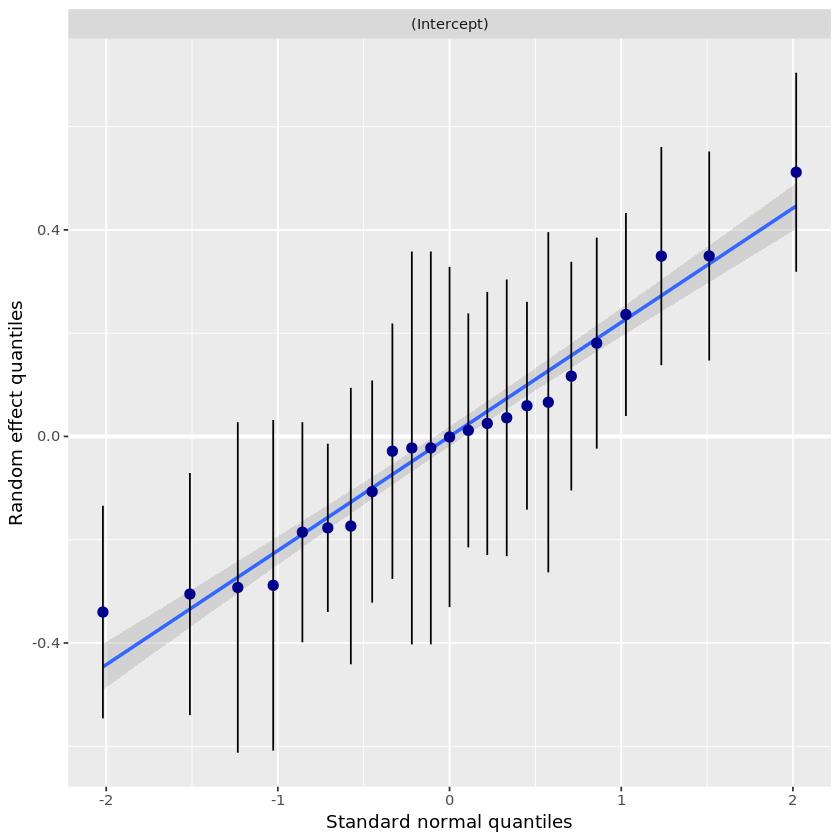

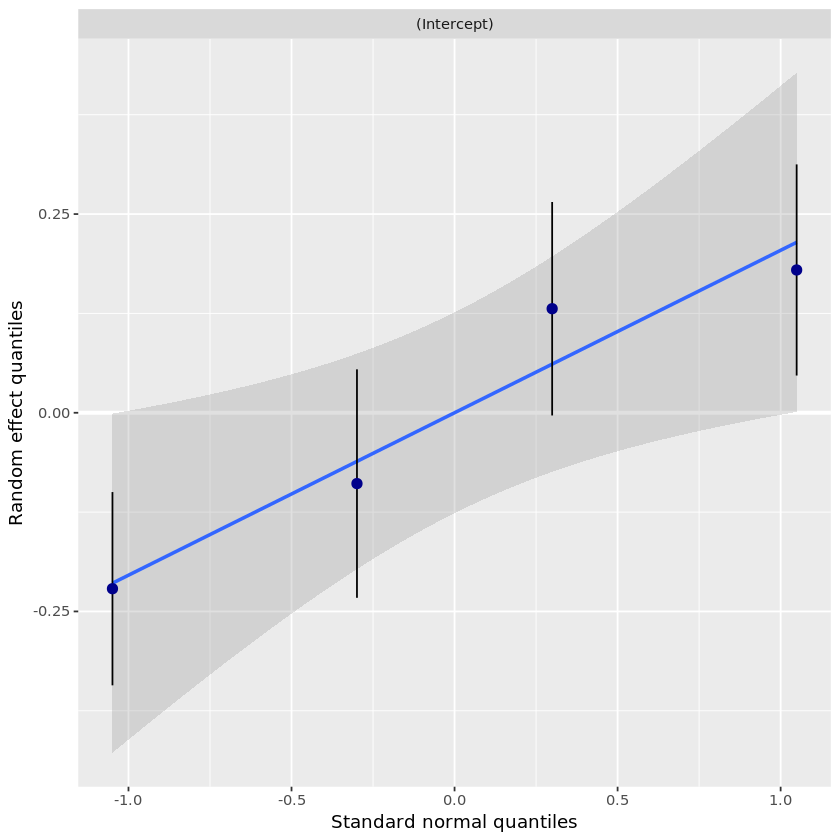

`geom_smooth()` using formula 'y ~ x'


[[1]]

[[2]]
[[2]]$order

[[2]]$season


[[3]]

[[4]]


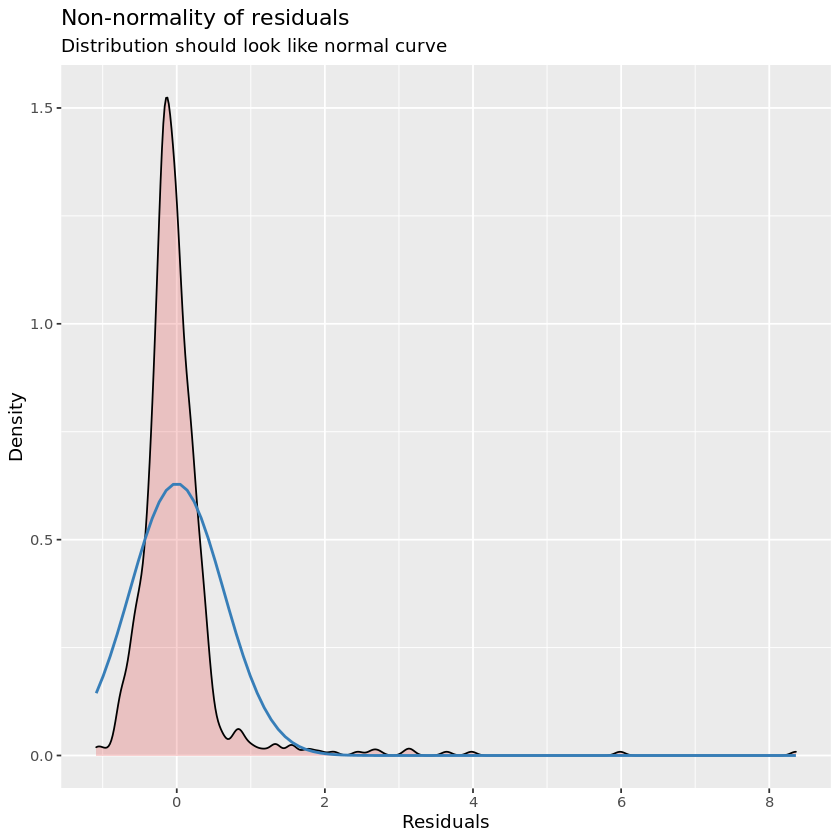

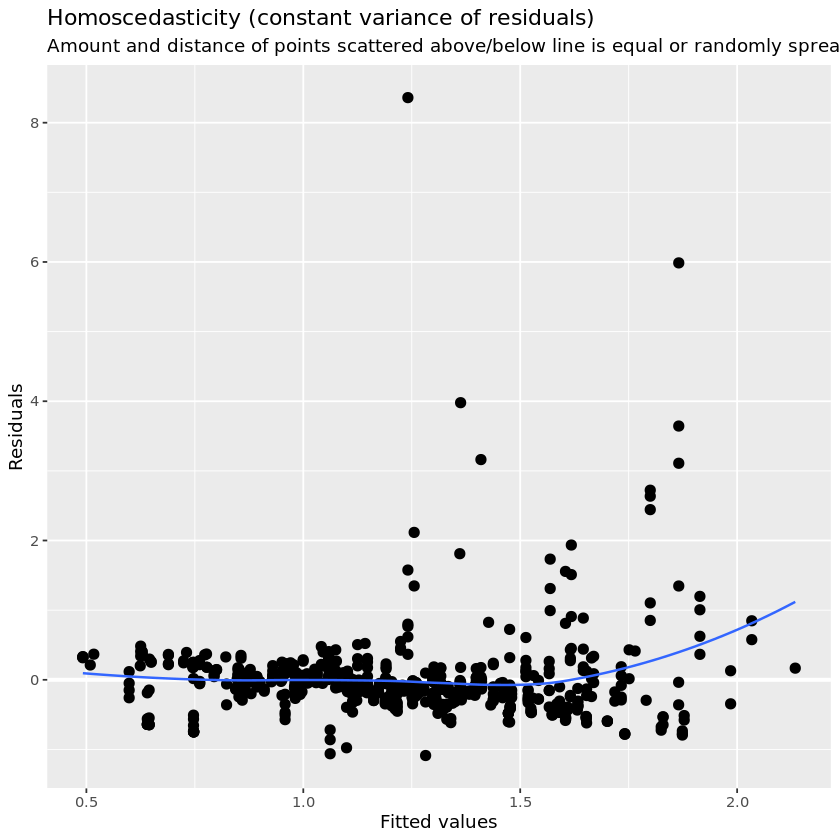

In [522]:
plot_model(seas, type='diag')

Model contains polynomial or cubic / quadratic terms. Consider using `terms="lat_scaled [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.
Model contains polynomial or cubic / quadratic terms. Consider using `terms="sst_scaled [all]"` to get smooth plots. See also package-vignette 'Marginal Effects at Specific Values'.


$lat_scaled

$sst_scaled


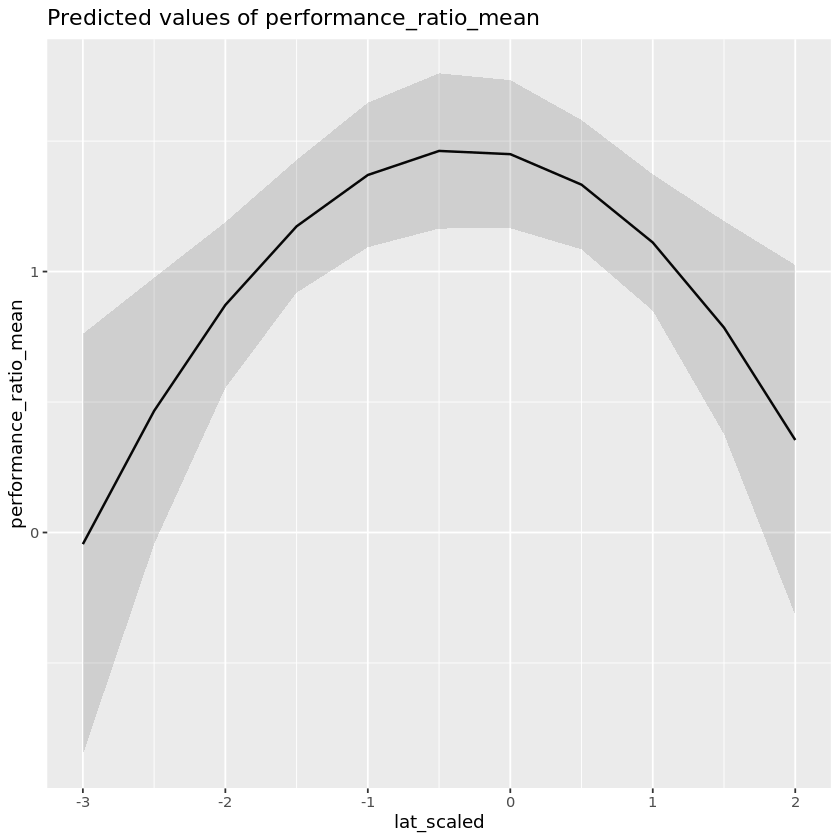

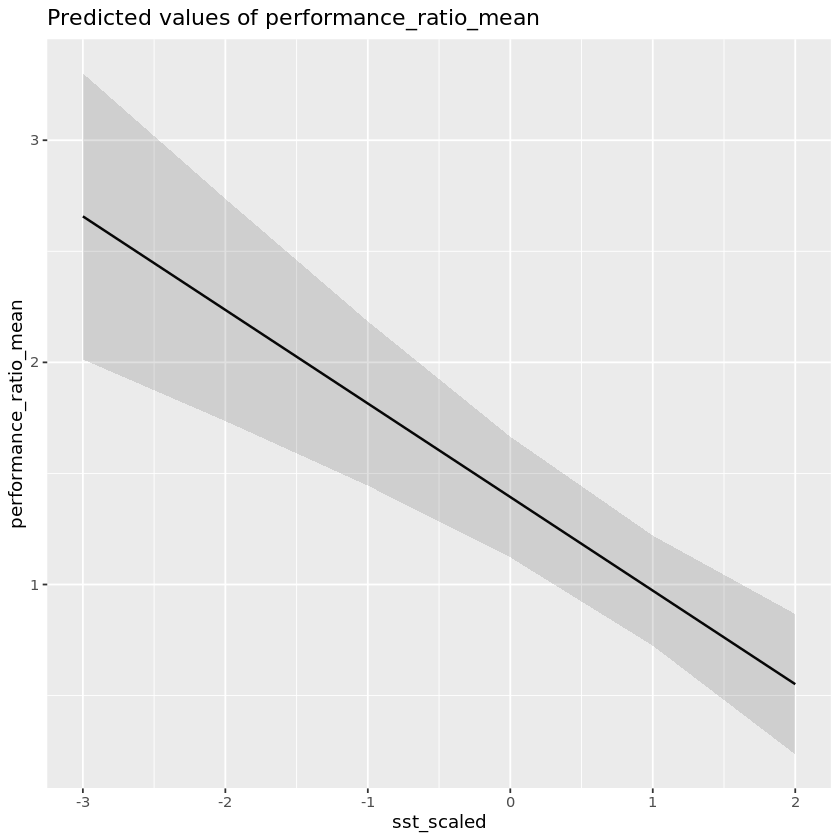

In [509]:
plot_model(seas, type='pred', xlim=c(-10, 10))

In [479]:
library(lmerTest)


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

